In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv ('gdrive/My Drive/wine.csv', header=None, names=['Species','Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
df.head()


,Species,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df = df.loc[:, ['Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']].values

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 489 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=86e3cef22a3f75383ae106204881813d9d7ff36bcebd1e3f6c93c593b826d071
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
# Kaiser-Meyer-Olkin Test
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7786821205606519

In [ ]:
# Bartlett’s Test
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix 
# against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# In this Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(1317.1808094724372, 2.468617032425556e-224)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
X = df
# .loc[:, ['Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)
# Covariance matrix
cov_mat = np.cov(X.T)
cov_mat

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

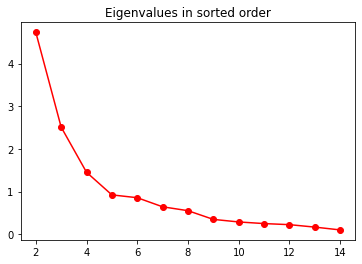

In [ ]:
# Obtain eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(cov_mat)
# Sort eigenvalues and eigenvectors in order of decreasing eigenvalue
idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]
# Plot eigenvalues in decreasing order
plt.plot(np.arange(2,15), eigenvals, 'ro-')
plt.title('Eigenvalues in sorted order')
eigenvals


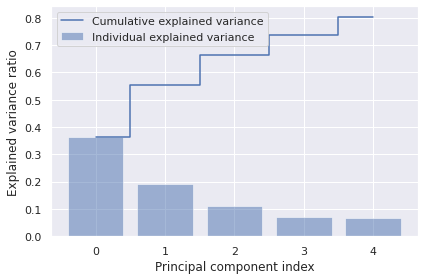

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
# df_pca


In [ ]:
df_pca.to_csv(r'gdrive/My Drive/output.csv', index = False)

In [ ]:
df_joined = pd.concat([df_pca, df.Species], axis = 1)
df_joined

,principal component 1,principal component 2,principal component 3,Species
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


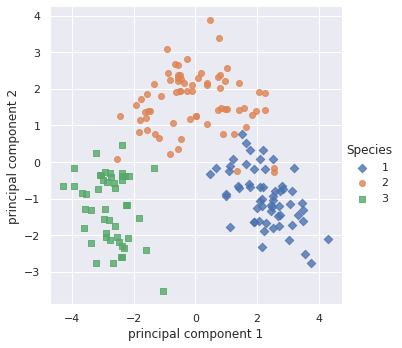

In [ ]:
sns.lmplot('principal component 1', 'principal component 2', 
data=df_joined, fit_reg=False, hue="Species", markers=['D','o','s'])

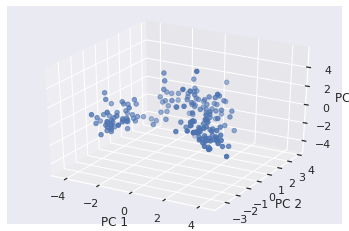

In [ ]:
df = df_joined
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['principal component 1']
y = df['principal component 2']
z = df['principal component 3']

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

ax.scatter(x, y, z)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
df1 = pd.read_csv ('gdrive/My Drive/seeds_dataset.csv', header=None, sep='\s+', names=['area A','perimeter P','compactness C','length of kernel',
'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'Species'])
df1.head()

FileNotFoundError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
X = df1.loc[:, ['area A','perimeter P','compactness C','length of kernel','width of kernel', 'asymmetry coefficient', 'length of kernel groove']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)
# Covariance matrix
cov_mat = np.cov(X.T)
cov_mat

array([[ 1.00478469,  0.99909854,  0.61119889,  0.9545308 ,  0.97541544,
        -0.23067077,  0.86782525],
       [ 0.99909854,  1.00478469,  0.53177587,  0.97707507,  0.94935008,
        -0.21838028,  0.89504603],
       [ 0.61119889,  0.53177587,  1.00478469,  0.36967551,  0.7652787 ,
        -0.33305686,  0.22791011],
       [ 0.9545308 ,  0.97707507,  0.36967551,  1.00478469,  0.86453176,
        -0.1723833 ,  0.93726927],
       [ 0.97541544,  0.94935008,  0.7652787 ,  0.86453176,  1.00478469,
        -0.25927117,  0.75271583],
       [-0.23067077, -0.21838028, -0.33305686, -0.1723833 , -0.25927117,
         1.00478469, -0.01113203],
       [ 0.86782525,  0.89504603,  0.22791011,  0.93726927,  0.75271583,
        -0.01113203,  1.00478469]])

array([5.05527392e+00, 1.20330286e+00, 6.81247474e-01, 6.86915798e-02,
       1.88031478e-02, 5.35755786e-03, 8.16283865e-04])

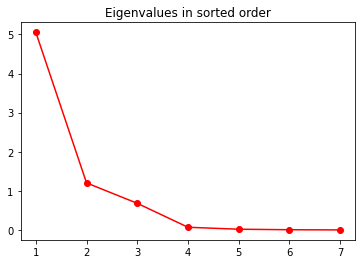

In [ ]:
# Obtain eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(cov_mat)
# Sort eigenvalues and eigenvectors in order of decreasing eigenvalue
idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]
# Plot eigenvalues in decreasing order
plt.plot(np.arange(1,8), eigenvals, 'ro-')
plt.title('Eigenvalues in sorted order')
eigenvals

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df1_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
df1_pca.head()

,principal component 1,principal component 2
0,0.317047,0.783669
1,-0.003386,1.913214
2,-0.459443,1.907225
3,-0.591936,1.931069
4,1.102910,2.068090


In [ ]:
df_joined = pd.concat([df_pca, df.Species], axis = 1)
df_joined.head()

,principal component 1,principal component 2,Species
0,-3.522934,-1.453098,1
1,-2.528858,0.330019,1
2,-2.785029,-1.036936,1
3,-3.922588,-2.768210,1
4,-1.407511,-0.867773,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


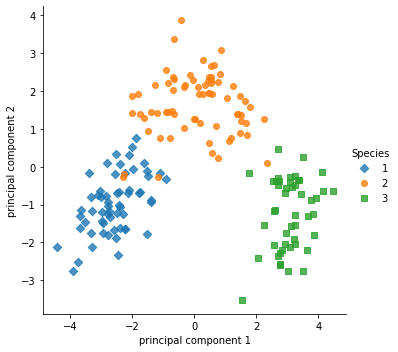

In [ ]:
sns.lmplot('principal component 1', 'principal component 2', data=df_joined, fit_reg=False, hue="Species", markers=['D','o','s'])